**Perkenalan**

Nama : Iqbal janitra

Batch : 003

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


**DATA LOADING**

Memasukan file data yang akan di olah dan di eksplorasi

SELECT report_date, load_type, load_time, load_weight, dropoff_site 
FROM bigquery-public-data.austin_waste.waste_and_diversion 

In [88]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/GCpase0/GC1PASE0/GC2/h8dsft_P0GC2_Iqbal_Janitra.csv")

**DATA CLEANING**

In [89]:
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH


melihat ukuran table


In [90]:
df.shape

(26157, 5)

melihat info jenis data type

Merubah data type report_date menjadi datetime

In [91]:
df['report_date'] = pd.to_datetime(df['report_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_type     26157 non-null  object        
 2   load_time     26157 non-null  object        
 3   load_weight   25109 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


mencari mising data

In [92]:
df.isnull().sum()

report_date        0
load_type          0
load_time          0
load_weight     1048
dropoff_site       0
dtype: int64

mendrop missing data

In [93]:
df.dropna(subset = 'load_weight', axis = 0,inplace=True)

In [94]:
df.isnull().sum()

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

In [95]:
df.sort_values(by='report_date', inplace=True, ascending=True) 
df

,report_date,load_type,load_time,load_weight,dropoff_site
19227,2021-01-02,ORGANICS,2021-01-02 09:51:00.000000 UTC,16760.0,ORGANICS BY GOSH
19159,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 02:00:00.000000 UTC,10580.0,TDS LANDFILL
19160,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:55:00.000000 UTC,21300.0,TDS LANDFILL
19161,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:56:00.000000 UTC,17160.0,TDS LANDFILL
19162,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 01:42:00.000000 UTC,15240.0,TDS LANDFILL
...,...,...,...,...,...
211,2021-07-09,BRUSH,2021-07-09 06:00:00.000000 UTC,5500.0,HORNSBY BEND
207,2021-07-09,BRUSH,2021-07-09 02:57:00.000000 UTC,5500.0,HORNSBY BEND
208,2021-07-09,BRUSH,2021-07-09 03:45:00.000000 UTC,5500.0,HORNSBY BEND
217,2021-07-09,BRUSH,2021-07-09 06:20:00.000000 UTC,5500.0,HORNSBY BEND


In [96]:
df.reset_index(inplace=True, drop=True)
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-02,ORGANICS,2021-01-02 09:51:00.000000 UTC,16760.0,ORGANICS BY GOSH
1,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 02:00:00.000000 UTC,10580.0,TDS LANDFILL
2,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:55:00.000000 UTC,21300.0,TDS LANDFILL
3,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 12:56:00.000000 UTC,17160.0,TDS LANDFILL
4,2021-01-02,GARBAGE COLLECTIONS,2021-01-02 01:42:00.000000 UTC,15240.0,TDS LANDFILL
...,...,...,...,...,...
25104,2021-07-09,BRUSH,2021-07-09 06:00:00.000000 UTC,5500.0,HORNSBY BEND
25105,2021-07-09,BRUSH,2021-07-09 02:57:00.000000 UTC,5500.0,HORNSBY BEND
25106,2021-07-09,BRUSH,2021-07-09 03:45:00.000000 UTC,5500.0,HORNSBY BEND
25107,2021-07-09,BRUSH,2021-07-09 06:20:00.000000 UTC,5500.0,HORNSBY BEND


**DATA EXPLORATION**

In [97]:
df['report_date']

0       2021-01-02
1       2021-01-02
2       2021-01-02
3       2021-01-02
4       2021-01-02
           ...    
25104   2021-07-09
25105   2021-07-09
25106   2021-07-09
25107   2021-07-09
25108   2021-07-09
Name: report_date, Length: 25109, dtype: datetime64[ns]

In [98]:
daterange = pd.date_range(start = '2021-01-02', end = '2021-07-09')
daterange

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', length=189, freq='D')

In [99]:
df.load_type.unique()

array(['ORGANICS', 'GARBAGE COLLECTIONS', 'MIXED LITTER', 'DEAD ANIMAL',
       'BULK', 'RECYCLING - SINGLE STREAM', 'TIRES', 'YARD TRIMMING',
       'BRUSH', 'SWEEPING', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

Melihat jumlah load disetiap load type

In [100]:
df['load_type'].value_counts().to_frame()

,load_type
GARBAGE COLLECTIONS,8241
RECYCLING - SINGLE STREAM,6760
ORGANICS,5749
BULK,1594
BRUSH,1514
SWEEPING,360
MIXED LITTER,329
TIRES,175
DEAD ANIMAL,150
YARD TRIMMING,137


In [101]:
df.dropoff_site.unique()

array(['ORGANICS BY GOSH', 'TDS LANDFILL', 'BALCONES RECYCLING', 'MRF',
       'TDS - MRF', 'HORNSBY BEND', 'AUSTIN IRON AND METAL',
       'GREAT NORTHERN', 'AUSTIN WOOD RECYCLING', 'PARK BEND',
       'ON ROUTE HIGH DUMP', 'BALCONES WOODS', 'STEINER LANDFILL',
       'WESTFIELD'], dtype=object)

Disini yang kita ketahui kita memeliki 14 site untuk di 

In [102]:
df['dropoff_site'].value_counts().to_frame()

,dropoff_site
TDS LANDFILL,10691
ORGANICS BY GOSH,5741
BALCONES RECYCLING,3837
TDS - MRF,2948
HORNSBY BEND,1652
MRF,168
AUSTIN IRON AND METAL,50
ON ROUTE HIGH DUMP,7
GREAT NORTHERN,6
PARK BEND,4


Melihat jumlah load terbesar

In [103]:
df['load_weight'].max()

245540.0

melihat jumlah load terkecil

In [104]:
df['load_weight'].min()

0.0

**CENTRAL TENDENCY**

membagi tabel antara tanggal dan jumlah load yang masuk setiap tanggalnya

In [105]:
df.groupby(by = 'report_date', sort = True)['load_weight'].mean()

report_date
2021-01-02    13822.484076
2021-01-04    13840.094787
2021-01-05    12705.000000
2021-01-06    13314.166667
2021-01-07    13397.417582
                  ...     
2021-07-05    13267.762238
2021-07-06    12010.250000
2021-07-07    11173.237410
2021-07-08    12657.589286
2021-07-09     5730.476190
Name: load_weight, Length: 165, dtype: float64

mengabungkan untuk melihat jumlah load yang masuk di setiap sitenya sesuai dengan mean-nya

In [106]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           19153.333333
HORNSBY BEND              6628.644068
MRF                       1799.982143
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
PARK BEND                13385.000000
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15169.407215
WESTFIELD                16020.000000
Name: load_weight, dtype: float64

mengabungkan untuk melihat jumlah load yang masuk di setiap sitenya sesuai dengan medeianya

In [107]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.0
AUSTIN WOOD RECYCLING     4050.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
GREAT NORTHERN           21110.0
HORNSBY BEND              6390.0
MRF                       1360.0
ON ROUTE HIGH DUMP       14940.0
ORGANICS BY GOSH         11920.0
PARK BEND                12330.0
STEINER LANDFILL           780.0
TDS - MRF                10330.0
TDS LANDFILL             14920.0
WESTFIELD                16020.0
Name: load_weight, dtype: float64

melihat berapa kali dan total setiap load yang masuk ke setiap site

In [108]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].apply(pd.Series.mode)

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0     8700.0
                       1    17160.0
                       2    20900.0
                       3    21320.0
                       4    21960.0
                       5    24880.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0     4060.0
                       1     7480.0
                       2    12500.0
                       3    14940.0
                       4    15040.0
                       5    15200.0
                       6    18460.0
ORGANICS BY GOSH       0    14580.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
STE

In [109]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

In [110]:
organics = df.loc[df['load_type']=='ORGANICS']
organics

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-02,ORGANICS,2021-01-02 09:51:00.000000 UTC,16760.0,ORGANICS BY GOSH
9,2021-01-02,ORGANICS,2021-01-04 07:20:00.000000 UTC,6200.0,ORGANICS BY GOSH
10,2021-01-02,ORGANICS,2021-01-02 03:25:00.000000 UTC,16800.0,ORGANICS BY GOSH
22,2021-01-02,ORGANICS,2021-01-02 11:08:00.000000 UTC,20560.0,ORGANICS BY GOSH
23,2021-01-02,ORGANICS,2021-01-04 07:24:00.000000 UTC,21440.0,ORGANICS BY GOSH
...,...,...,...,...,...
25061,2021-07-08,ORGANICS,2021-07-09 02:53:00.000000 UTC,12080.0,ORGANICS BY GOSH
25062,2021-07-08,ORGANICS,2021-07-08 04:08:00.000000 UTC,14980.0,ORGANICS BY GOSH
25063,2021-07-08,ORGANICS,2021-07-08 03:32:00.000000 UTC,12860.0,ORGANICS BY GOSH
25064,2021-07-08,ORGANICS,2021-07-08 03:28:00.000000 UTC,9470.0,ORGANICS BY GOSH


melihat jumlah rata-rata disetiap site pembuangan khusus organic

In [111]:
organics_total = organics.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum() 
organics_total

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67744966.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

disini kita tertarik dengan "ORGANIC BY GOSH" karna memiliki load terbesar di setiap sitenya, selanjutnya kita memisahkan dengan membuat variable baru khusus untuk gosh

In [112]:
gosh = df.loc[df['dropoff_site']=='ORGANICS BY GOSH']
gosh

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-02,ORGANICS,2021-01-02 09:51:00.000000 UTC,16760.0,ORGANICS BY GOSH
9,2021-01-02,ORGANICS,2021-01-04 07:20:00.000000 UTC,6200.0,ORGANICS BY GOSH
10,2021-01-02,ORGANICS,2021-01-02 03:25:00.000000 UTC,16800.0,ORGANICS BY GOSH
22,2021-01-02,ORGANICS,2021-01-02 11:08:00.000000 UTC,20560.0,ORGANICS BY GOSH
23,2021-01-02,ORGANICS,2021-01-04 07:24:00.000000 UTC,21440.0,ORGANICS BY GOSH
...,...,...,...,...,...
25061,2021-07-08,ORGANICS,2021-07-09 02:53:00.000000 UTC,12080.0,ORGANICS BY GOSH
25062,2021-07-08,ORGANICS,2021-07-08 04:08:00.000000 UTC,14980.0,ORGANICS BY GOSH
25063,2021-07-08,ORGANICS,2021-07-08 03:32:00.000000 UTC,12860.0,ORGANICS BY GOSH
25064,2021-07-08,ORGANICS,2021-07-08 03:28:00.000000 UTC,9470.0,ORGANICS BY GOSH


melihat jumlah rata-rata di sampah organics

In [113]:
organics=organics.value_counts().sum()


In [114]:
organics

5749

meluhat jumlah rata-rata di site gosh

In [115]:
gosh_rate = gosh.value_counts().sum()
gosh_rate

5741

melihat jumlah pengaruh di setiap sampah organics yang masuk di "organics by gosh"  dan terlihat setiap sampah organics masuk ke "organics by gosh"

In [116]:
gosh_total_data = gosh_rate/organics*100
print(gosh_total_data,'%')

99.8608453644112 %


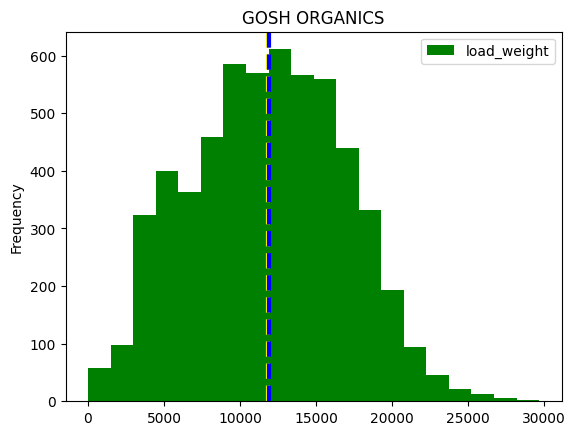

In [117]:
gosh.plot.hist(title='GOSH ORGANICS', color='green', bins=20)  
plt.axvline(gosh['load_weight'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(gosh['load_weight'].median(), color='blue', linestyle='dashed', linewidth=3)
plt.show()

dari visualisasi di atas terlihat banyak sampah organics 

selanjutnya kita melihat data outliers, dan terilah data outliers tidak terlalu banyak

<AxesSubplot: ylabel='load_weight'>

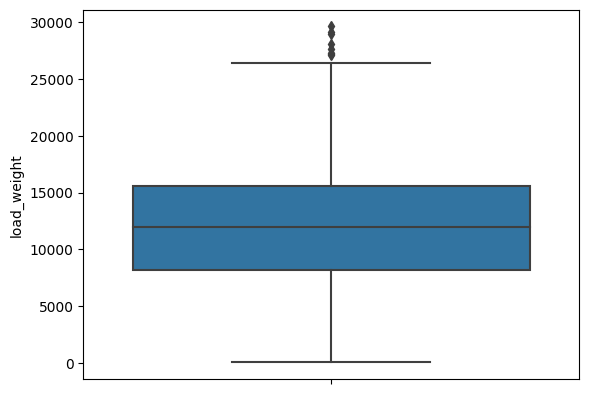

In [118]:
sns.boxplot(data=gosh, y = 'load_weight')

In [119]:
goshmean = gosh['load_weight'].mean()
goshmean

11818.482145967602

In [120]:
goshmean = gosh['load_weight'].median()
goshmean

11920.0

In [121]:
goshstd = gosh['load_weight'].std()
goshstd

5070.76391789726

In [122]:
outliersplus = goshmean + 3*goshstd
outliersplus

27132.29175369178

In [123]:
outliersmin = goshmean - 3*goshstd
outliersmin

-3292.291753691781

In [124]:
gosh.loc[gosh['load_weight'] > 27132.2917]

,report_date,load_type,load_time,load_weight,dropoff_site
6551,2021-02-26,ORGANICS,2021-02-26 05:12:00.000000 UTC,27620.0,ORGANICS BY GOSH
6972,2021-03-01,ORGANICS,2021-03-01 05:36:00.000000 UTC,27300.0,ORGANICS BY GOSH
9304,2021-03-15,ORGANICS,2021-03-15 12:00:00.000000 UTC,27240.0,ORGANICS BY GOSH
20497,2021-06-02,ORGANICS,2021-06-02 05:39:00.000000 UTC,28120.0,ORGANICS BY GOSH
20635,2021-06-03,ORGANICS,2021-06-03 07:05:00.000000 UTC,29660.0,ORGANICS BY GOSH
21008,2021-06-07,ORGANICS,2021-06-07 12:00:00.000000 UTC,29000.0,ORGANICS BY GOSH
22023,2021-06-14,ORGANICS,2021-06-14 06:15:00.000000 UTC,29160.0,ORGANICS BY GOSH


In [125]:
goshtotoutlier = gosh.loc[gosh['load_weight'] > 21051.38].value_counts().sum()
goshtotoutlier

164

dari sini kita lihat rate pengaruh data outliers terhadap keseluruhan data yang data, dan disini saya akan mengahpusnya 

In [126]:
goshoutlierstotal = goshtotoutlier/gosh_rate*100
print(goshoutlierstotal, '%')

2.8566451837658944 %


mengdrop data outliers

In [127]:
gosh.drop(index = [6551,6972,9304,20497,20635,21008,22023], inplace=True)

/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_796/4187679539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gosh.drop(index = [6551,6972,9304,20497,20635,21008,22023], inplace=True)


melihat data setelah di drop

In [128]:
gosh.count()

report_date     5734
load_type       5734
load_time       5734
load_weight     5734
dropoff_site    5734
dtype: int64

<AxesSubplot: ylabel='load_weight'>

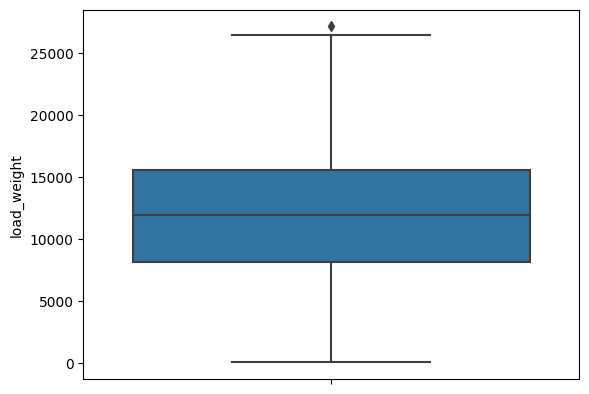

In [129]:
sns.boxplot(data=gosh, y = 'load_weight')

dan sudah bisa dilihat data outliers sudah berhasil kita hapuskan dan kita sudah mendapatkan data yang kita inginkan untuk "ORGANIC BY GOSH"

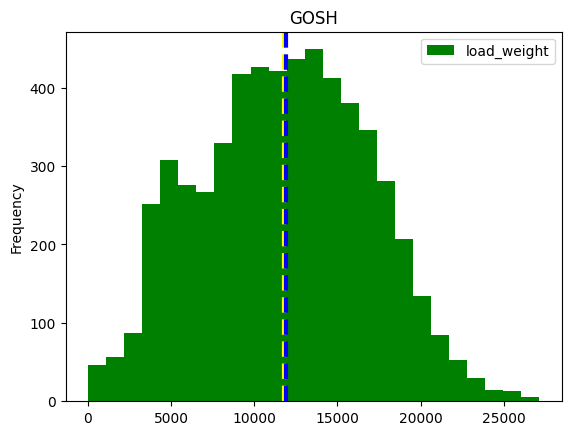

In [130]:
gosh.plot.hist(title='GOSH', color='green', bins=25)  
plt.axvline(gosh['load_weight'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(gosh['load_weight'].median(), color='blue', linestyle='dashed', linewidth=3)
plt.show()

**ON ROUTE HIGH DUMP**

Disini kita akan menambahkan data pada "ON ROUTE HIGH DUMP" yang untuk kita bandingkan dengan "ORGANICS BY GOSH" dengan kemudian kita akan melakukkan uji hipotesis dengan antara kedua data tersebut

In [131]:
dump = df.loc[df['dropoff_site']=='ON ROUTE HIGH DUMP']
dump

,report_date,load_type,load_time,load_weight,dropoff_site
8411,2021-03-09,ORGANICS,2021-03-09 12:00:00.000000 UTC,12500.0,ON ROUTE HIGH DUMP
8952,2021-03-11,ORGANICS,2021-03-11 11:00:00.000000 UTC,15200.0,ON ROUTE HIGH DUMP
9202,2021-03-14,ORGANICS,2021-03-14 12:00:00.000000 UTC,15040.0,ON ROUTE HIGH DUMP
13575,2021-04-12,ORGANICS,2021-04-12 04:51:00.000000 UTC,18460.0,ON ROUTE HIGH DUMP
14004,2021-04-14,ORGANICS,2021-04-14 04:27:00.000000 UTC,4060.0,ON ROUTE HIGH DUMP
20788,2021-06-04,ORGANICS,2021-06-04 02:45:00.000000 UTC,7480.0,ON ROUTE HIGH DUMP
22019,2021-06-14,ORGANICS,2021-06-14 02:55:00.000000 UTC,14940.0,ON ROUTE HIGH DUMP


menghitung jumlah data

In [132]:
dump_rate = dump.value_counts().sum()
dump_rate

7

mmenghitung total data yang ada di 'on route high dump'

In [133]:
dump['load_type'].value_counts()

ORGANICS    7
Name: load_type, dtype: int64

menghitung total data dari 'on route high dump' di keseluruhan organics

In [134]:
dump_total_data = dump_rate/organics*100
print(dump_total_data,'%')

0.1217603061401983 %


membuat plot dari 'high dump'

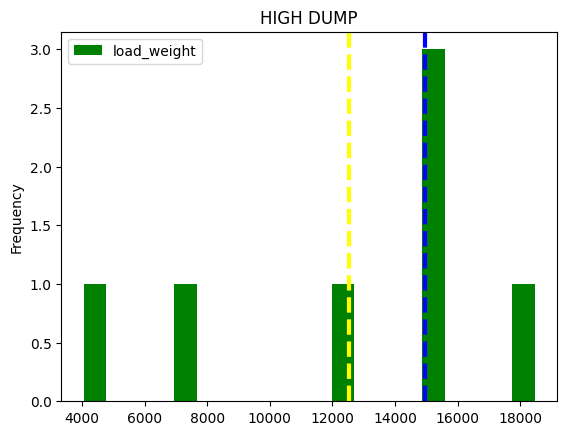

In [137]:
dump.plot.hist(title='HIGH DUMP', color='green', bins=20)  
plt.axvline(dump['load_weight'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(dump['load_weight'].median(), color='blue', linestyle='dashed', linewidth=3)
plt.show()

mencari outlier dengan boxplot

<AxesSubplot: ylabel='load_weight'>

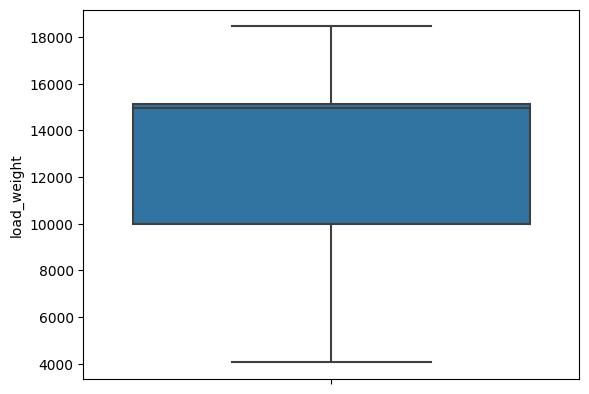

In [138]:
sns.boxplot(data=dump, y = 'load_weight')

Seperti yang terlihat kita tidak mendapatkan data outliers, selanjutnya kita langsung melakukan simulasi saja.

menghitung mean dari 'dump'

In [141]:
dumpmean = dump['load_weight'].mean()
dumpmean

12525.714285714286

menghitung median dari 'dump'

In [142]:
dumpmedian = dump['load_weight'].median()
dumpmedian

14940.0

**HYPHOTHESIS TESTING**

setelah memperoleh data yang diinginkan 'organics by gosh' dan 'on route high dump', kemudian kita mencari P value dan T statistics nya

In [143]:
# t-test 2 sample 2 tailed
tstat, pval = stats.ttest_ind(gosh['load_weight'], dump['load_weight'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('Pvalue:',pval)
print('Tstatistics:',tstat)

Pvalue: 0.7028300149734512
Tstatistics: -0.38152207954886747


### HYPOTHESIS TESTING

Di sini saya akan memplot Tstat dengan menghasilkan angka yang acak sehingga saya dapat memprediksi nilai data masa depan,  mengingat angka acak yang saya hasilkan berdasarkan data saya dari 'organics by gosh' dan 'on route high dump'

1918.3215046036494
21678.40189965167


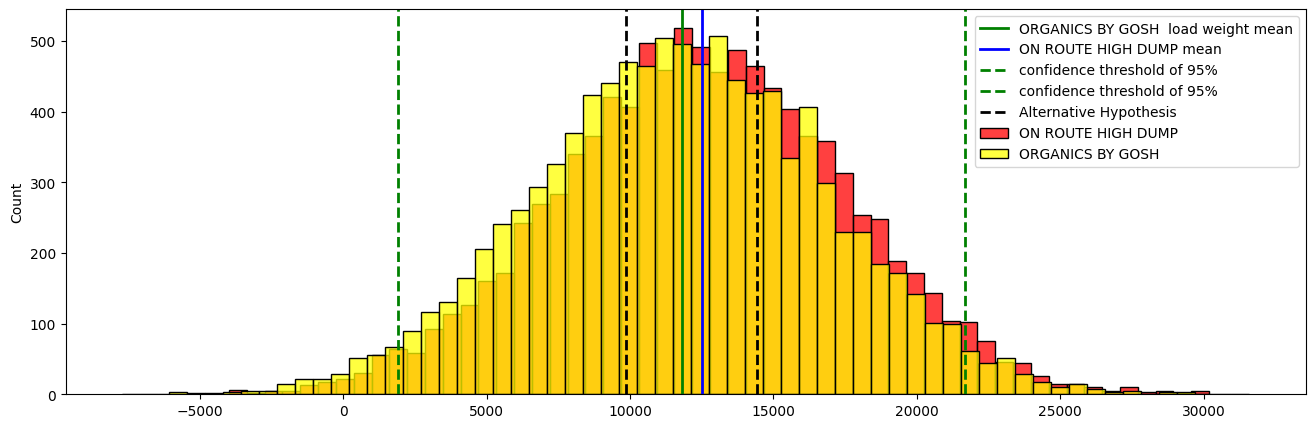

In [145]:
# simulation
goshfig = np.random.normal(gosh['load_weight'].mean(),gosh['load_weight'].std(),10000)
dumpfig = np.random.normal(dump['load_weight'].mean(),dump['load_weight'].std(),10000)

# confidence interval based on ORGANICS BY GOSH
ci = stats.norm.interval(0.95, gosh['load_weight'].mean(), gosh['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(dumpfig, label='ON ROUTE HIGH DUMP',color='red')
sns.histplot(goshfig, label='ORGANICS BY GOSH ',color='yellow')


# mean
plt.axvline(gosh['load_weight'].mean(), color='green', linewidth=2, label='ORGANICS BY GOSH  load weight mean')
plt.axvline(dump['load_weight'].mean(), color='blue',  linewidth=2, label='ON ROUTE HIGH DUMP mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[3], colot='green', linestyle='dasher', linewidth=2, label=)


# alternative hypotesis
plt.axvline(goshfig.mean()+tstat*goshfig.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(dumpfig.mean()-tstat*dumpfig.std(), color='black', linestyle='dashed', linewidth=2)


plt.legend()
print(ci[0])
print(ci[1])


**`QUESTION`**

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
    
    Saya menggunakan tenknik Z-Score. Z score adalah cara yang paling efisien untuk menemukan outliers karena skor ini membantu untuk memahami apakah nilai data lebih besar atau lebih kecil dari rata-rata dan seberapa jauh jaraknya dari rata-rata. Lebih khusus lagi, Z-skor memberi tahu berapa banyak standar deviasi dari titik data dari rata-rata.

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
    
    saya menggunakan konsep confidence interval untuk mengukur seberapa akuran "mean" di lokasi ORGANICS BY GOSH dan ON ROUTE HIGH DUMP. Jika hipotesis berada dalam onfidence interval, maka H0 kita (hipotesis null) tidak ditolak. Yang berarti tidak ada signifikansi dalam perubahan. Sebaliknya, H0 (hipotesis null) ditolak jika hipotesis kita berada di luar selang kepercayaan.

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

    saya menggunakan "2 sample 2 tails"uji statistik parametrik yang membandingkan dua kelompok independen untuk menentukan apakah ada bukti bahwa rata-rata populasi secara statistik signifikan berbeda. Variabel yang digunakan dalam uji ini yaitu variabel terikat dan variabel bebas.


# PROBLEM 2

In [154]:
f = df.groupby('report_date')['load_weight'].sum().to_frame()
f

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


In [155]:
v = np.diff(f['load_weight'])/np.diff(range(165))

In [156]:
weight_tommorow = f['load_weight'][-1] + v[-1]*1

In [157]:
abs(weight_tommorow)

1176970.0

## Questions 2
1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
    
    menggunakan perhitungan metode numeric, dengan munggunakan 'dif' function yang di immport dengan numpy

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

    Ya saya membutuhkan fungsi matematika, karena rumus yang diberikan dapat dihitung dengan memasukkan nilai data. Jadi saya menggunakan fungsi matematika untuk menghitung diferensial dalam data sehingga yang dihasilkan digunakan untuk rumus dalam memprediksi berat beban sampah yang akan diperolehbesok.
    
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

    1176970.0